# 1. K-means clustering

- from sklearn.cluster import KMeans

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(irisDF.shape)

(150, 4)


In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
#kmeans 객체 생성
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=0)

#붓꽃 데이터에 군집화 수행
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

### 군집 중심점 할당

In [25]:
print(kmeans.labels_)

irisDF['cluster'] = kmeans.labels_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


### 타겟 별 중심점 확인

In [27]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 군집화가 효과적으로 됐는지 확인
# 붓꽃 데이터 셑의 target 값을 'target' 칼럼으로, 앞에서 구한 labels_값을 'cluster'칼럼으로 지정해 추가
# groupby를 통해 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수 를 비교
# 분류 타깃 0값인 데이터는 1로 그루핑완료. 타깃 1과 2는 분산 되었음.

irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
print(iris_result)

target  cluster
0       0          50
1       1           2
        2          48
2       1          36
        2          14
Name: sepal length (cm), dtype: int64


In [30]:
# 시각화 < 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 맞추기위해 PCA로 2차원 축소

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusetr,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,0,-2.888991,-0.144949


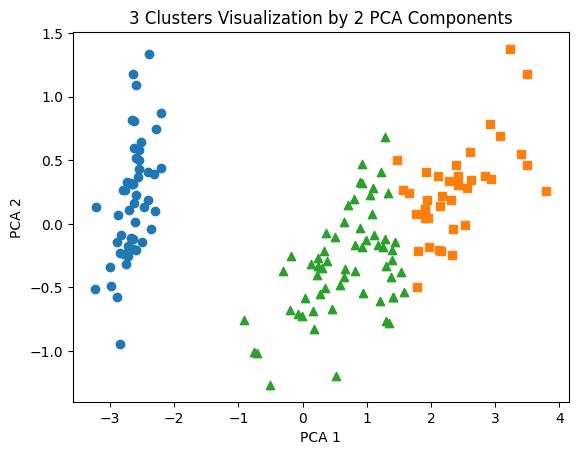

In [31]:
# pca_x X좌표 값, pca_y Y좌표 값. 각 군집별로 마커 'o','s','^'로 표현


# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
# < matplotlib의 산점도는 서로 다른 마커를 한 번에 표현 불가하여 마커별로 별도의 산점도 수행
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

# Mean_shift clustering

In [40]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [41]:
meanshift=MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [42]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [43]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels유형:', np.unique(cluster_labels))

cluster labels유형: [0 1 2]


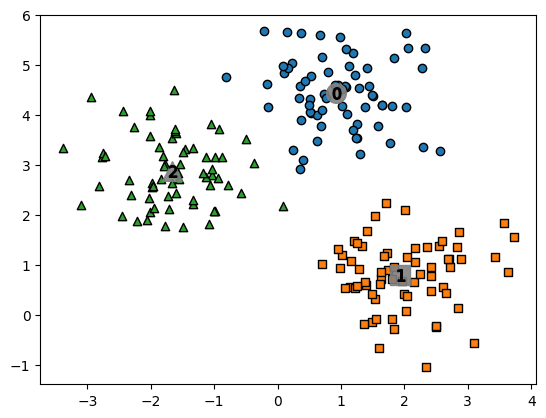

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    #군집별로 다른 마커도 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200,color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70 ,color='k', edgecolor='k',marker='$%d$' % label)

plt.show()

In [45]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


---
# 2. K-means, DBSCAN 비교

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

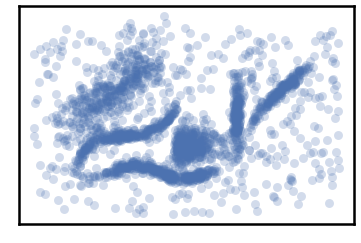

In [2]:
data = np.load('../datasets/clusterable_data.npy')
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [3]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

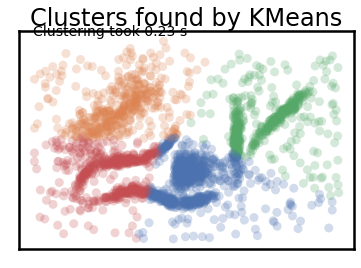

In [4]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':4})

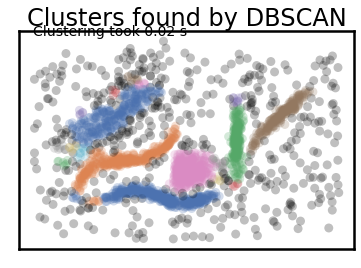

In [5]:
plot_clusters(data, cluster.DBSCAN, (), {'eps':0.020})

---
# 3. 군집평가 : 실루엣계수
- 실루엣 계수는 (타클러스터와 중심간 거리)/(클러스터내 데이터와 중심간 거리)
- -1 ~ +1 의 범위를 가지며 1에 가까울 수록 좋은 클러스터링이라고 볼 수 있다.
- 실루엣 계수만 생각할 것이 아니고 각 라벨의 편차도 생각해줘야한다.
- 각 라벨의 갯수가 골고루 가져야 보다 잘 군집화를 했다고 볼 수 있다.

In [8]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()

feature_names = ["sepal_length", "sepal_with", " petal_length", "petal_width"]
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)

# kmeans 군집화 수행
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(irisDF)
# 데이터당 클러스터값 할당
irisDF["cluster"] = kmeans.labels_

print(irisDF.shape)
irisDF.head()

(150, 5)


,sepal_length,sepal_with,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [11]:
# iris의 모든 개별 데이터에 실루엣 계수값을 구함
score_samples = silhouette_samples(iris.data, irisDF["cluster"])
print("silhouette_samples() return 값의 shape", score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF["silhouette_coeff"] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함.
average_score = silhouette_score(iris.data, irisDF["cluster"])
print("붓꽃 데이터셋 Silhouette Analysis Score:{0:.3f}".format(average_score))

irisDF.head(15)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.553


,sepal_length,sepal_with,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


In [22]:
irisDF.groupby("cluster")["silhouette_coeff"].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

<AxesSubplot: >

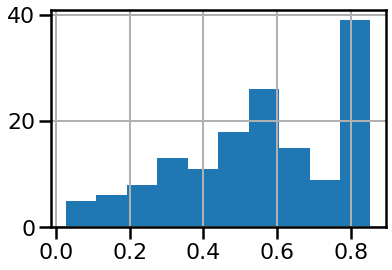

In [19]:
irisDF["silhouette_coeff"].hist()
# setosa는 군집화가 잘 되었지만(위에서 확인한 0.8)
# verginica와 virsicolor는 잘 되지 않았다.

In [20]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                            'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

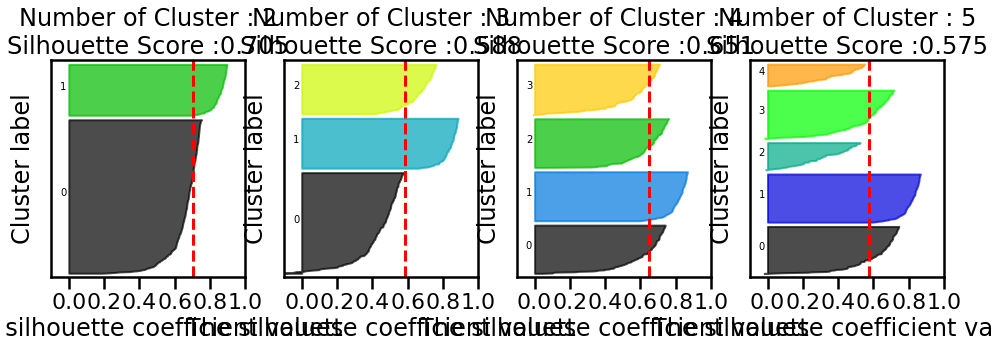

In [21]:
# make_blobs을 통해 clustering을 위한 3개의 클러스터 중심의 500개 2차원 데이터셋 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std = 1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 개수 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)